In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(clinical_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = data_complete.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]


# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_std_error = data_complete.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
group_std_error_df = pd.DataFrame(group_std_error)
#group_std_error_df = pd.DataFrame({'Tumor Volume (mm3)': group_std_error})

# Preview DataFrame
group_std_error_df


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [5]:
# Minor Data Munging to Re-Format the Data Frames
meanreformat = mean_tumor_volume_df.reset_index()
meanpivot = meanreformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
meanpivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Clean it so that it shows only the 4 drugs that we care about

mean_tumor_volume_4 = meanpivot[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
mean_tumor_volume_4.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [7]:
#capdrug= mean_tumor_volume_df.keys()


In [8]:
#Reset index of standard error data so that it matches the meanpivot table we just made

error_reformat=group_std_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [9]:
#clean standard error data so that it is only the 4 drugs we care about
error_df4 = error_pivot[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
error_df4.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


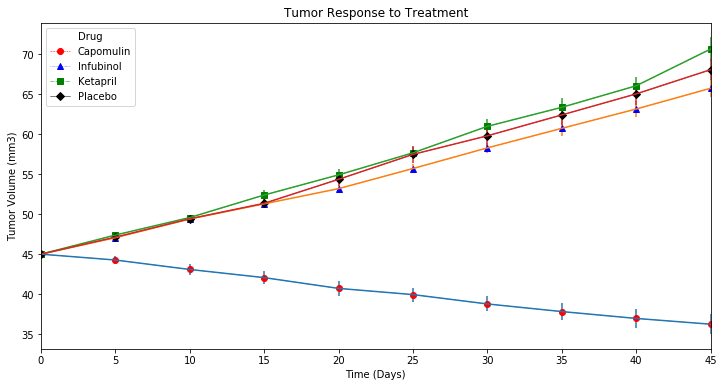

In [19]:
#Generate the Plot (with Error Bars)
drugs4 = ["Capomulin","Infubinol","Ketapril","Placebo"]

ax = mean_tumor_volume_4.plot(figsize=(12,6), yerr = error_df4, 
                           legend=False)
# plot the markers
mean_tumor_volume_4.plot( style=['o--r', '^:b', 's-.g', 'D-k'], 
                         markersize=6, linewidth =0.5, ax = ax, )
# Save the Figure
plt.xticks(np.arange(0, 50, step=5))
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim()
plt.title('Tumor Response to Treatment')

plt.savefig("../Pymaceuticals/Tumor-Volume-Changes-Over-Time-for-Each-Treatment.png")
# Show the Figure
plt.show()

In [35]:
# Show the original starter figure provided by class repo folder
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [51]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_means = data_complete.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
meta_means_df = pd.DataFrame(meta_means)
meta_means_df = meta_means_df.reset_index()
meta_means_df= meta_means_df.pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
# Preview DataFrame
meta_means_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [52]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_error = data_complete.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
meta_error_df = pd.DataFrame(meta_error)
meta_error_df = meta_error_df.reset_index()

meta_error_df= meta_error_df.pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
# # Preview DataFrame
meta_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [54]:
# Select only the 4 drugs we care about

meta_means_4 = meta_means_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

meta_error_4 = meta_error_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]

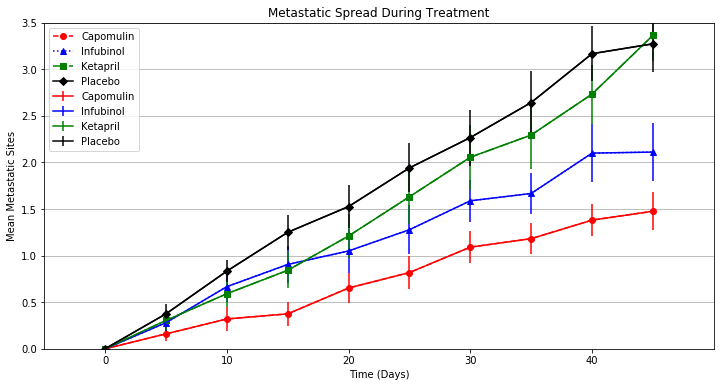

In [55]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.


# Generate the Plot (with Error Bars)
ax = meta_means_4.plot(figsize=(12,6), yerr = meta_error_4, 
                               color =["r","b","g","k"], legend = False)



# plot the markers
meta_means_4.plot( style=['o--r', '^:b', 's-.g', 'D-k'], 
                         markersize=6, ax = ax)

# set the titles, axis labels, horizontal grids, x,y limits
ax.set_title("Metastatic (cancer spreading) changes over time for each treatment")
ax.set_xlabel("Treatment Duration (days)")
ax.set_ylabel("Metastatic Sites")
ax.set_xlim(-5,50)
ax.set_ylim(0,3.5)
ax.set_xticks([0,10,20,30,40])
ax.yaxis.grid()

plt.legend()

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Mean Metastatic Sites')


# Save the Figure
plt.savefig("../Pymaceuticals/Metastatic-Spread-During-Treatment.png")
# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [66]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_counts = data_complete.groupby(['Drug', 'Timepoint']).agg({'Mouse ID' : 'count'}).reset_index()
mice_counts = mice_counts.set_index('Timepoint')
mice_counts = mice_counts.pivot(index=mice_counts.index, columns='Drug')['Mouse ID']
mice_counts = mice_counts[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
# Convert to DataFrame
mice_counts_df=pd.DataFrame(mice_counts)
# Preview DataFrame
mice_counts_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


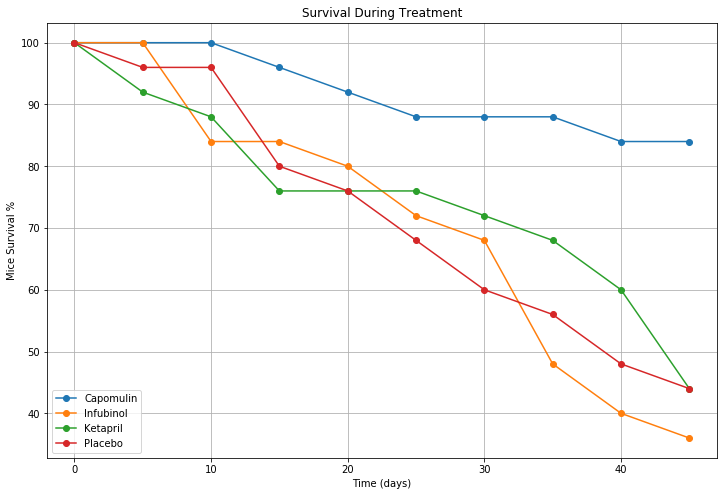

In [68]:
# select the 4 drugs
mice_counts4 = mice_counts_df[["Capomulin", "Infubinol", "Ketapril","Placebo"]]
mice_counts4

# Generate the plot (accounting the precentages)
times = list(mice_counts4.index.values)
total_mice=mice_counts4.iloc[0,0]
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(times,mice_counts4/total_mice*100, marker="o")
plt.legend(["Capomulin", "Infubinol", "Ketapril","Placebo"], loc='lower left')


# set the titles, axis labels, horizontal grids, x,y limits
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel('Mice Survival %')
plt.xlim(-2,47)
plt.xticks([0,10,20,30,40])
plt.grid()

plt.savefig("../Pymaceuticals/Mouse-Counts-Changes-Over-Time-for-Each-Treatment.png")
plt.show()

In [95]:
# Calculate the percent changes for each drug
pct_change= 100*(meanpivot.iloc[meanpivot.shape[1]-1]- \
            meanpivot.iloc[0])/meanpivot.iloc[0]
# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [96]:
#show starter example of survival during treatment graph

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [97]:
#show summary bar graph example

![Metastatic Spread During Treatment](../Images/change.png)

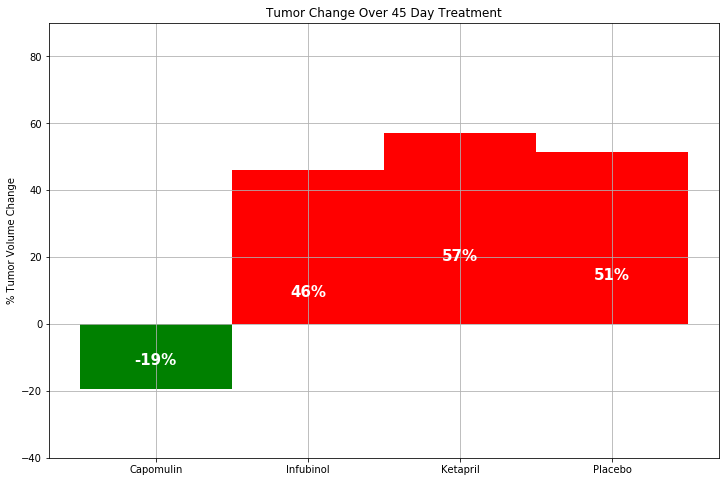

In [99]:
# Store all Relevant Percent Changes into a Tuple

change_heights =[]
change_heights.append(pct_change.get(key="Capomulin"))
change_heights.append(pct_change.get(key="Infubinol"))
change_heights.append(pct_change.get(key="Ketapril"))
change_heights.append(pct_change.get(key="Placebo"))

# # Splice the data between passing and failing drugs

colors =[]
for value in change_heights:
    if value < 0:
        colors.append("g")
    elif value >=0:
        colors.append("r")

# Set the plot title, labels, and limites    
fig, ax=plt.subplots(figsize=(12,8))
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim(-40,90)
drugs=["Capomulin", "Infubinol", "Ketapril","Placebo"]
ax.grid()


# Plot the bar

bars=plt.bar(drugs,change_heights, width=1, color=colors, align="center")

# get y-axis height to calculate lable position from.

(y_bottom, y_top)= ax.get_ylim()
y_height = y_top - y_bottom

# print values

for bar in bars:    
    height = bar.get_height()
    p_height = (height /y_height)
    
    if p_height > 0.10:
        label_position = height - (y_height * 0.30)
    else:
        label_position = height + (y_height * 0.05)
     
    # plot the labels
    plt.text(bar.get_x()+ bar.get_width()/2. , label_position, '{:.0f}%'.format(height),
            ha = 'center', va='bottom', color = "white", fontsize = 15, fontweight="bold")
    
# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
fig.show()
